In [1]:
# Imports
import scipy.io
import h5py
import time
from h5py import File # Package used for loading data from the input h5 file
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path_data_mat = '/Users/obando_c/Documents/Neuro/EmergencyBraking/Data/Raw/'
file_name = "VPja.mat" # VPja.mat ; VPbax.mat

In [3]:
# Extract data cnt - contains data of different channels:
# EEG,'EMGf', 'lead_gas', 'lead_brake', 'dist_to_lead', 'wheel_X', 'wheel_Y', 'gas', 'brake'
start = time.time()
with h5py.File(path_data_mat + file_name, 'r') as f:
    print("Number of tests in ",file_name, ": ", len(list(f)))
    print("Items inside ",file_name, ": ", list(f.items()))
    cnt = f.get('cnt')
    print("Items in cnt", list(cnt.items()) )
    T = np.array(cnt.get('T'))
    clab = np.array(cnt.get('clab')) # clab is the electrode names
    file = np.array(cnt.get('file'))
    fs = np.array(cnt.get('fs')) # fs is the sampling rate
    title = np.array(cnt.get('title'))
    x = np.array(cnt.get('x')) # x is the continuous multivariate data
    
end = time.time()
print("Elapsed time:", (end - start), "s")

Number of tests in  VPja.mat :  4
Items inside  VPja.mat :  [('#refs#', <HDF5 group "/#refs#" (144 members)>), ('cnt', <HDF5 group "/cnt" (6 members)>), ('mnt', <HDF5 group "/mnt" (8 members)>), ('mrk', <HDF5 group "/mrk" (4 members)>)]
Items in cnt [('T', <HDF5 dataset "T": shape (3, 1), type "<f8">), ('clab', <HDF5 dataset "clab": shape (69, 1), type "|O">), ('file', <HDF5 dataset "file": shape (8, 1), type "<u2">), ('fs', <HDF5 dataset "fs": shape (1, 1), type "<f8">), ('title', <HDF5 dataset "title": shape (22, 1), type "<u2">), ('x', <HDF5 dataset "x": shape (69, 1619951), type "<f8">)]
Elapsed time: 6.521728992462158 s


In [4]:
# Extract name of channels 
f = h5py.File(path_data_mat + file_name,'r') 
test = f['cnt/clab']
name_elec = list()
for j in range(len(test)):
    st = test[j][0]
    obj = f[st]
    str1 = ''.join(chr(i) for i in obj[:])
    name_elec.append(str1)
print("Names of channels:")
print(name_elec)

Names of channels:
['EOGv', 'Fp1', 'Fp2', 'AF3', 'AF4', 'EOGh', 'F7', 'F5', 'F3', 'F1', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP7', 'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'P9', 'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO7', 'PO3', 'POz', 'PO4', 'PO8', 'O1', 'Oz', 'O2', 'EMGf', 'lead_gas', 'lead_brake', 'dist_to_lead', 'wheel_X', 'wheel_Y', 'gas', 'brake']


In [15]:
len(name_elec)

69

In [5]:
# Extract data mrk - contains information on the EVENTS
start = time.time()
with h5py.File(path_data_mat + file_name, 'r') as f:
    mrk = f.get('mrk')
    print("Items in mrk", list(mrk.items()) )
    className = np.array(mrk.get('className')) # are the names of the different types of events
    event = mrk.get('event') # 
    print("Items in event", list(event.items()) )
    react = np.array(event.get('react'))
    time_mrk = np.array(mrk.get('time')) # mrk.time is the timestamp for each event in milliseconds
    y = np.array(mrk.get('y')) # mrk.y is a binary matrix telling which of the five types each event is
    
end = time.time()
print("Elapsed time:", (end - start), "s")

Items in mrk [('className', <HDF5 dataset "className": shape (5, 1), type "|O">), ('event', <HDF5 group "/mrk/event" (1 members)>), ('time', <HDF5 dataset "time": shape (948, 1), type "<f8">), ('y', <HDF5 dataset "y": shape (948, 5), type "<f8">)]
Items in event [('react', <HDF5 dataset "react": shape (1, 948), type "<f8">)]
Elapsed time: 0.005502939224243164 s


In [19]:
event

<Closed HDF5 group>

In [6]:
# Extract className
f = h5py.File(path_data_mat + file_name,'r') 
test = f['mrk/className']
className = list()
for j in range(len(test)):
    st = test[j][0]
    obj = f[st]
    str1 = ''.join(chr(i) for i in obj[:])
    className.append(str1)
print("Class names:")
print(className)
car_brake_y = time_mrk.T*y[:,1] # contains the time in ms of events car_brake 

Class names:
['car_normal', 'car_brake', 'car_hold', 'car_collision', 'react_emg']


Text(0.5, 1.0, 'Events subject VPja.mat')

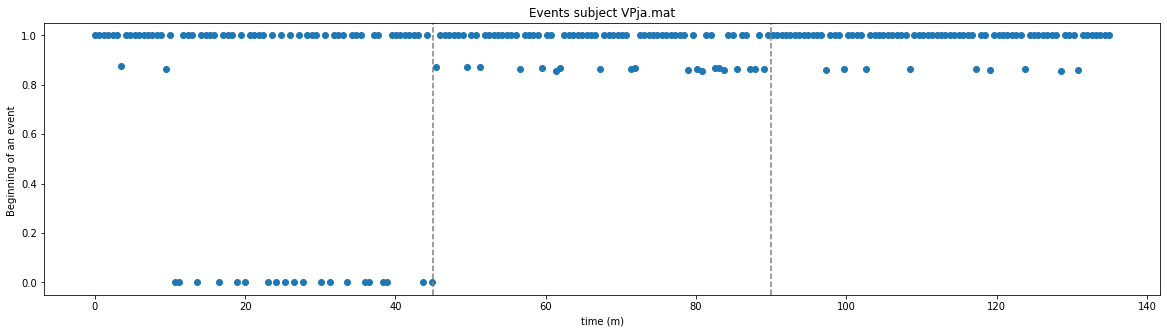

In [7]:
#  Experiments consisted of
# Three blocks (45 min each, marked with grey vertical dash) of driving were conducted with rest periods of 10–15 min in between 
# During these periods, 225 ± 17 critical (emergency braking) situations were artificially induced 
lead_brake_index = 63
m = 100
events_y = np.array(car_brake_y[car_brake_y>0]/5).astype(int)
plt.figure(figsize=(20,5))
#x[events_ms/5,::m]
plt.plot(np.linspace(start = 0, stop = x.shape[1], num =len(x[lead_brake_index,events_y]))/200/60, x[lead_brake_index,events_y], linestyle=' ', marker="o")
plt.axvline(x=45, color='gray', linestyle='--')
plt.axvline(x=90, color='gray', linestyle='--')
plt.xlabel("time (m)")
plt.ylabel("Beginning of an event ")
plt.title('Events subject ' + file_name)

Text(0.5, 1.0, 'Example of a target segment')

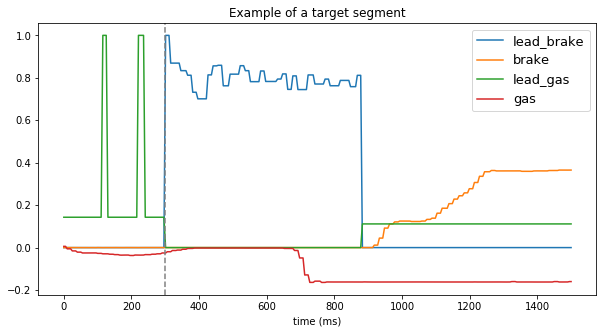

In [8]:
event_index = 0 # Index of an event
ts_i = 60 # Target segment interval intial point
ts_f = 240 # Target segment interval intial point
event_tiem = events_y[event_index]
plt.figure(figsize=(10,5))
x1 = np.linspace(start = 0, stop =(ts_i+ts_f)*5, num =(ts_i+ts_f))
plt.plot(x1,x[lead_brake_index,event_tiem-ts_i:event_tiem+ts_f], label="lead_brake")
plt.plot(x1,x[68,event_tiem-ts_i:event_tiem+ts_f], label = "brake")
plt.plot(x1,x[62,event_tiem-ts_i:event_tiem+ts_f], label="lead_gas")
plt.plot(x1,x[67,event_tiem-ts_i:event_tiem+ts_f], label = "gas")
#plt.plot(x1,x[61,event_tiem-ts_i:event_tiem+ts_f], label = "EMGf")
plt.axvline(x=ts_i*5, color='gray', linestyle='--')
plt.xlabel("time (ms)")
plt.legend(fontsize=13)
plt.title("Example of a target segment")

In [39]:
# Construct matrix with all target segments for channel chn_name
ts_i = 60 # Target segment interval intial point -> corresponds to 300ms
ts_f = 240 # Target segment interval intial point -> corresponds to 1200ms
chn_name = "P9"
channel = np.where(np.asarray(name_elec) == chn_name)[0]
A = np.zeros((len(events_y), ts_f+ts_i))
for event_index in range(len(events_y)):
    event_tiem = events_y[event_index]
    A[event_index,:] = x[channel,event_tiem-ts_i:event_tiem+ts_f]

In [40]:
A.shape

(230, 300)

Text(0.5, 1.0, 'Channel P9')

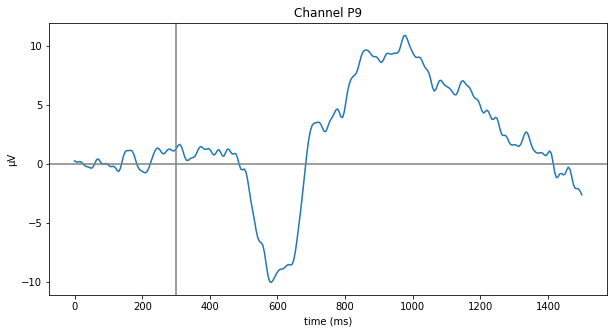

In [41]:
# Plot Event-Related-Potential 
plt.figure(figsize=(10,5))
A.shape
A_norm = np.subtract(A,np.array(A[:,:20].mean(1)).reshape(A.shape[0],1))
plt.plot(np.linspace(start = 0, stop = A_norm.shape[1]*5, num =A_norm.shape[1]), A_norm.mean(0))
plt.axvline(x=300, color='gray', linestyle='-')
plt.axhline(y=0, color='gray', linestyle='-')
plt.xlabel("time (ms)")
plt.ylabel(u"\u03bcV")
plt.title('Channel ' + chn_name)

In [133]:
noevents_int = np.append(np.append(0, events_y), x.shape[1])
noevents_len = np.diff(noevents_int)

In [143]:
range(noevents_seg)

range(0, -6)

In [147]:
noevents_seg

-6

In [160]:
gap_sml = 600 # 3000 ms apart from any stimulus
nts_offset = 100 # 500 ms
for event_index in range(len(noevents_len)):
    noevents_seg = int((noevents_len[event_index] - gap_sml*2 - ts_i + ts_f) / nts_offset)
    if(noevents_seg>0):
        for noevent_ix in range(noevents_seg):
            ip = noevents_int[event_index] + gap_sml + nts_offset*noevent_ix
            fp = ip + ts_i + ts_f
            A = x[channels_eeg, ip:fp]
            # print(ip)

In [152]:
11154-10000

1154

In [153]:
events_y[0]

10554

In [154]:
11154 - events_y[0]


600

In [159]:
events_y[0] -  gap_sml - (ts_i + ts_f)

9654

Text(0.5, 1.0, 'Normal brain activity')

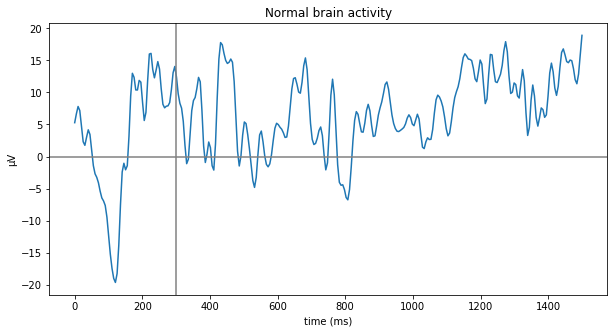

In [124]:
# Plot Event-Related-Potential 
plt.figure(figsize=(10,5))
A.shape
A_norm = np.subtract(A,np.array(A[:,:20].mean(1)).reshape(A.shape[0],1))
plt.plot(np.linspace(start = 0, stop = A_norm.shape[1]*5, num =A_norm.shape[1]), A_norm.mean(0))
plt.axvline(x=300, color='gray', linestyle='-')
plt.axhline(y=0, color='gray', linestyle='-')
plt.xlabel("time (ms)")
plt.ylabel(u"\u03bcV")
plt.title('Normal brain activity')


In [139]:
ip

1618993

In [140]:
fp

1619293

In [127]:
x.shape

(69, 1619951)

In [141]:
1619951 - fp

658

In [129]:
events_y[-1]-fp

295

In [130]:
print(x.shape)
print(events_y[-1])
print(x.shape[1]-events_y[-1])

(69, 1619951)
1619588
363


In [131]:
ts_i + ts_f

300

In [144]:
len(events_y)

230